The dataset for this project is the Breast cancer wisconsin (diagnostic) dataset. Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

Main objective of the analysis is to focus on classification of the cell. In this project, I will be using different classification models to classify wether the cell is Malignant or Benign based on the features . best candidate model with the best results will be chosen. 

# Data exploration and preprocessing


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [38]:
from sklearn.datasets import load_breast_cancer
data=load_breast_cancer(as_frame=True)

In [39]:
df_X1=pd.DataFrame(data.data,columns=data.feature_names)
df_y1=pd.DataFrame(data.target)

In [40]:
cancer_data = pd.concat([df_X1, df_y1], axis=1)


In [41]:
cancer_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

as we can see above we have 28 features and all of them are numeric which requires no encoding to be used

In [80]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations=cancer_data.corr()
sns.heatmap(data=correlations ,square=True,cmap='bwr')
sns.set(rc = {'figure.figsize':(15,10)})
plt.xticks(rotation=80,fontsize=14);
plt.yticks(rotation=0);


we can see that we have a lot of +ve and  -ve correlations up there in our heat map.
the target column is  -ve correlated with most of the features.
Its hard to tell all of our correlation using the heatmap as we have a lot of features.


Now lets check our features and their values. So we can tell that wether or not our data needs to be scaled

In [73]:
cancer_data.describe()


mean radius  mean texture  mean perimeter   mean area  mean smoothness  \
count   569.000000    569.000000      569.000000  569.000000       569.000000   
mean      0.338222      0.323965        0.332935    0.216920         0.394785   
std       0.166787      0.145453        0.167915    0.149274         0.126967   
min       0.000000      0.000000        0.000000    0.000000         0.000000   
25%       0.223342      0.218465        0.216847    0.117413         0.304595   
50%       0.302381      0.308759        0.293345    0.172895         0.390358   
75%       0.416442      0.408860        0.416765    0.271135         0.475490   
max       1.000000      1.000000        1.000000    1.000000         1.000000   

       mean compactness  mean concavity  mean concave points  mean symmetry  \
count        569.000000      569.000000           569.000000     569.000000   
mean           0.260601        0.208058             0.243137       0.379605   
std            0.161992        0.186785             0.192857       0.138456   
min            0.000000        0.000000             0.000000       0.000000   
25%            0.139685        0.069260             0.100944       0.282323   
50%            0.224679        0.144189             0.166501       0.369697   
75%            0.340531        0.306232             0.367793       0.453030   
max            1.000000        1.000000             1.000000       1.000000   

       mean fractal dimension  ...  worst texture  worst perimeter  \
count              569.000000  ...     569.000000       569.000000   
mean                 0.270379  ...       0.363998         0.283138   
std                  0.148702  ...       0.163813         0.167352   
min                  0.000000  ...       0.000000         0.000000   
25%                  0.163016  ...       0.241471         0.167837   
50%                  0.243892  ...       0.356876         0.235320   
75%                  0.340354  ...       0.471748         0.373475   
max                  1.000000  ...       1.000000         1.000000   

       worst area  worst smoothness  worst compactness  worst concavity  \
count  569.000000        569.000000         569.000000       569.000000   
mean     0.170906          0.404138           0.220212         0.217403   
std      0.139932          0.150779           0.152649         0.166633   
min      0.000000          0.000000           0.000000         0.000000   
25%      0.081130          0.300007           0.116337         0.091454   
50%      0.123206          0.397081           0.179110         0.181070   
75%      0.220901          0.494156           0.302520         0.305831   
max      1.000000          1.000000           1.000000         1.000000   

       worst concave points  worst symmetry  worst fractal dimension  \
count            569.000000      569.000000               569.000000   
mean               0.393836        0.263307                 0.189596   
std                0.225884        0.121954                 0.118466   
min                0.000000        0.000000                 0.000000   
25%                0.223127        0.185098                 0.107700   
50%                0.343402        0.247782                 0.163977   
75%                0.554639        0.318155                 0.242949   
max                1.000000        1.000000                 1.000000   

           target  
count  569.000000  
mean     0.627417  
std      0.483918  
min      0.000000  
25%      0.000000  
50%      1.000000  
75%      1.000000  
max      1.000000  

[8 rows x 31 columns]

as we can see our features fall on  different ranges of value, hence we need to scale our data using minmax scaler.

In [45]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()

In [46]:
features=['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target']
cancer_data[features] = mm.fit_transform(cancer_data[features])

In [47]:
round(cancer_data.describe().T, 3)

count   mean    std  min    25%    50%    75%  max
mean radius              569.0  0.338  0.167  0.0  0.223  0.302  0.416  1.0
mean texture             569.0  0.324  0.145  0.0  0.218  0.309  0.409  1.0
mean perimeter           569.0  0.333  0.168  0.0  0.217  0.293  0.417  1.0
mean area                569.0  0.217  0.149  0.0  0.117  0.173  0.271  1.0
mean smoothness          569.0  0.395  0.127  0.0  0.305  0.390  0.475  1.0
mean compactness         569.0  0.261  0.162  0.0  0.140  0.225  0.341  1.0
mean concavity           569.0  0.208  0.187  0.0  0.069  0.144  0.306  1.0
mean concave points      569.0  0.243  0.193  0.0  0.101  0.167  0.368  1.0
mean symmetry            569.0  0.380  0.138  0.0  0.282  0.370  0.453  1.0
mean fractal dimension   569.0  0.270  0.149  0.0  0.163  0.244  0.340  1.0
radius error             569.0  0.106  0.100  0.0  0.044  0.077  0.133  1.0
texture error            569.0  0.189  0.122  0.0  0.105  0.165  0.246  1.0
perimeter error          569.0  0.099  0.095  0.0  0.040  0.072  0.123  1.0
area error               569.0  0.063  0.085  0.0  0.021  0.033  0.072  1.0
smoothness error         569.0  0.181  0.102  0.0  0.117  0.159  0.219  1.0
compactness error        569.0  0.174  0.134  0.0  0.081  0.137  0.227  1.0
concavity error          569.0  0.081  0.076  0.0  0.038  0.065  0.106  1.0
concave points error     569.0  0.223  0.117  0.0  0.145  0.207  0.279  1.0
symmetry error           569.0  0.178  0.116  0.0  0.102  0.153  0.219  1.0
fractal dimension error  569.0  0.100  0.091  0.0  0.047  0.079  0.127  1.0
worst radius             569.0  0.297  0.172  0.0  0.181  0.250  0.386  1.0
worst texture            569.0  0.364  0.164  0.0  0.241  0.357  0.472  1.0
worst perimeter          569.0  0.283  0.167  0.0  0.168  0.235  0.373  1.0
worst area               569.0  0.171  0.140  0.0  0.081  0.123  0.221  1.0
worst smoothness         569.0  0.404  0.151  0.0  0.300  0.397  0.494  1.0
worst compactness        569.0  0.220  0.153  0.0  0.116  0.179  0.303  1.0
worst concavity          569.0  0.217  0.167  0.0  0.091  0.181  0.306  1.0
worst concave points     569.0  0.394  0.226  0.0  0.223  0.343  0.555  1.0
worst symmetry           569.0  0.263  0.122  0.0  0.185  0.248  0.318  1.0
worst fractal dimension  569.0  0.190  0.118  0.0  0.108  0.164  0.243  1.0
target                   569.0  0.627  0.484  0.0  0.000  1.000  1.000  1.0

 As we can see all of our features  are now normalized and they all have values between 0 and 1

Now lets check our target column and see if our data is balanced or not

In [82]:
target = 'target'
data[target].value_counts()

1    357
0    212
Name: target, dtype: int64

we can see that our data is quietly not balanced, hence we are gonna be using stratified shuffle split to guarentee that our data will be splitted equally in the training and test sets

In [49]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuf_split = StratifiedShuffleSplit(n_splits=1, 
                                          test_size=0.3, 
                                          random_state=42)

train_idx, test_idx = next(strat_shuf_split.split(cancer_data[feature_cols], cancer_data.target))

# Create the dataframes
X_train = cancer_data.loc[train_idx, feature_cols]
y_train = cancer_data.loc[train_idx, 'target']

X_test  = cancer_data.loc[test_idx, feature_cols]
y_test  = cancer_data.loc[test_idx, 'target']

In [50]:
y_train.value_counts(normalize=True).sort_index()

0.0    0.371859
1.0    0.628141
Name: target, dtype: float64

In [51]:
y_test.value_counts(normalize=True).sort_index()

0.0    0.374269
1.0    0.625731
Name: target, dtype: float64

we can see now that our data is well splitted in the train and test values

with our data being  normalized well splitted and ready, lets try our regression models

# Logistic Regression

we will be defining a fucntion here that we will be using to plot the confusion matrices of our models

In [ ]:
def confusionMatrix(Matrix):
    fig, ax = plt.subplots(figsize=(7.5, 7.5))
    ax.matshow(Matrix, cmap=plt.cm.Blues, alpha=0.3)
    for i in range(Matrix.shape[0]):
        for j in range(Matrix.shape[1]):
            ax.text(x=j, y=i,s=Matrix[i, j], va='center', ha='center', size='xx-large')

    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

we will try Logistic regression as our first model

In [52]:
from sklearn.linear_model import LogisticRegression

# Standard logistic regression
lr = LogisticRegression(solver='liblinear').fit(X_train, y_train)

In [53]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, f1_score
y_predLR = lr.predict(X_test)
print(classification_report(y_test, y_predLR))
print('Accuracy score: ', round(accuracy_score(y_test, y_predLR), 2))
print('F1 Score: ', round(f1_score(y_test, y_predLR), 2))

              precision    recall  f1-score   support

         0.0       0.98      0.88      0.93        64
         1.0       0.93      0.99      0.96       107

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy score:  0.95
F1 Score:  0.96


logistic regression did well with the accuracy,f1 score and precison, but it was decent at the recall score for class 0 

In [54]:
conf_matrixLR = confusion_matrix(y_true=y_test, y_pred=y_predLR)


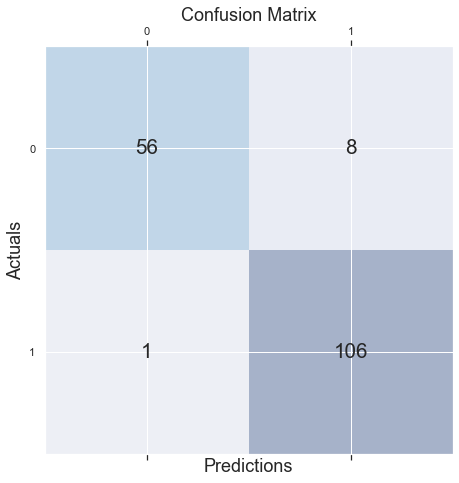

In [56]:
confusionMatrix(conf_matrixLR)

from our confusion matrix here we miss classified 8 samples as 1 intead of 0 for the 0 class and we only missclassified 1 sample as 0 instead of 1. which exlpains why our precision was better than the recall

# K-Nearest Neighbor(KNN)

Now lets check our KNN model chosing only 3 neighbors

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_predKNN = knn.predict(X_test)

In [58]:
print(classification_report(y_test, y_predKNN))
print('Accuracy score: ', round(accuracy_score(y_test, y_predKNN), 2))
print('F1 Score: ', round(f1_score(y_test, y_predKNN), 2))

              precision    recall  f1-score   support

         0.0       0.98      0.92      0.95        64
         1.0       0.95      0.99      0.97       107

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171

Accuracy score:  0.96
F1 Score:  0.97


Our accuracy here is better than the logistic regresion, alao the recall score has improved a lot

In [59]:
conf_matrixKNN = confusion_matrix(y_true=y_test, y_pred=y_predKNN)


In [60]:
confusionMatrix(conf_matrixKNN)

so here we only miss classified 5 samples as 1 instead of 0 (which explains why our recall has improved from that we had in the logistic regression) and again we missclassified only 1 sample as 0 instead of 1.

# Decisicon Tree

Now lets try the decsion tree model. 
I know that we previouly scaled our data for the KNN and LR models above. 
and this wont affect the decision tree classifier since trees don't get affected at all with the scaling of our data

In [61]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt = dt.fit(X_train, y_train)

In [62]:
dt.tree_.node_count, dt.tree_.max_depth

(31, 6)

In [90]:
from io import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

filename = 'CancerTree.png'
graph.write_png(filename)
Image(filename=filename) 

so after fitting our tree to the data set we ended up with a tree that has 36 nodes and 6 levels

In [63]:
from sklearn.metrics import precision_score, recall_score
def measure_error(y_true, y_pred, label):
    return pd.Series({'accuracy':accuracy_score(y_true, y_pred),
                      'precision': precision_score(y_true, y_pred),
                      'recall': recall_score(y_true, y_pred),
                      'f1': f1_score(y_true, y_pred)},
                      name=label)


In [64]:
# The error on the training and test data sets
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

train_test_full_error = pd.concat([measure_error(y_train, y_train_pred, 'train'),
                              measure_error(y_test, y_test_pred, 'test')],
                              axis=1)

train_test_full_error

train      test
accuracy     1.0  0.918129
precision    1.0  0.934579
recall       1.0  0.934579
f1           1.0  0.934579

our decision tree did perect job in the training data and also a very good job at our testing data.

In [65]:
conf_matrixDT = confusion_matrix(y_true=y_test, y_pred=y_test_pred)


In [66]:
confusionMatrix(conf_matrixDT)

so using our confusion matrix just on the test set 
we can see that in terms of recall our tree did a better job than the LR classifier but not as good as the KNN
we can also see that it did a worse job at the recall  score than the two previous classifiers

# Conclusion

so Knn is the model recommended here for our problem as it has the best precison,recall,accuracy followed by the Logisitc Regression then the decision tree

# Next steps


Our models can be improved in the future if we used Grid search CV to try to tune these models on the most suitable hyper parameters so we can come up with better resutls